## Loan Repayment in Banking

### Import Required Libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns',30)

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix

### Load Data

In [3]:
df_train = pd.read_csv("train_loan_data.csv")
df_train.head()

,addr_state,annual_inc,earliest_cr_line,emp_length,emp_title,fico_range_high,fico_range_low,grade,home_ownership,application_type,initial_list_status,int_rate,loan_amnt,num_actv_bc_tl,mort_acc,tot_cur_bal,open_acc,pub_rec,pub_rec_bankruptcies,purpose,revol_bal,revol_util,sub_grade,term,title,total_acc,verification_status,loan_status
0,CO,85000.0,Jul-97,10+ years,Deputy,744,740,E,MORTGAGE,Individual,w,18.99,18075,1.0,1.0,319479.0,7,0,0.0,debt_consolidation,5338,93.6,E1,60 months,Debt consolidation,8,Source Verified,Defaulted
1,CA,40000.0,Apr-87,10+ years,Department of Veterans Affairs,724,720,B,RENT,Individual,w,10.16,8800,4.0,0.0,19944.0,5,0,0.0,debt_consolidation,19944,60.3,B1,36 months,Credit Loan,12,Verified,Paid
2,FL,60000.0,Aug-07,10+ years,Marble polishing,679,675,B,MORTGAGE,Individual,w,11.47,18000,4.0,2.0,23199.0,7,0,0.0,debt_consolidation,23199,88.5,B5,36 months,Debt consolidation,16,Source Verified,Paid
3,IL,100742.0,Sep-80,10+ years,printer,664,660,B,MORTGAGE,Individual,w,9.16,20000,4.0,1.0,72651.0,12,0,0.0,debt_consolidation,18425,69.0,B2,36 months,Debt consolidation,19,Source Verified,Paid
4,MD,80000.0,Jul-99,10+ years,Southern Mgmt,669,665,F,RENT,Individual,f,23.83,35000,14.0,7.0,64631.0,23,0,0.0,debt_consolidation,34370,90.0,F5,60 months,Debt Connsolidation,59,Verified,Paid


In [4]:
df_test = pd.read_csv("test_loan_data.csv")
df_test.head()

,addr_state,annual_inc,earliest_cr_line,emp_length,emp_title,fico_range_high,fico_range_low,grade,home_ownership,application_type,initial_list_status,int_rate,loan_amnt,num_actv_bc_tl,mort_acc,tot_cur_bal,open_acc,pub_rec,pub_rec_bankruptcies,purpose,revol_bal,revol_util,sub_grade,term,title,total_acc,verification_status
0,MO,50000.0,May-2012,1 year,Tower technician,719.0,715.0,C,OWN,Individual,f,13.99,5000.0,1.0,0.0,33395.0,9.0,0.0,0.0,debt_consolidation,2568.0,9.8,C4,36 months,Debt consolidation,11.0,Source Verified
1,HI,92000.0,Dec-2001,10+ years,Supervisor,684.0,680.0,B,RENT,Individual,f,10.99,30000.0,2.0,2.0,229832.0,11.0,0.0,0.0,debt_consolidation,30394.0,75.4,B2,36 months,Debt consolidation,35.0,Source Verified
2,TX,89000.0,Mar-1989,10+ years,APPLICATIONS PROGRAMMER,679.0,675.0,B,MORTGAGE,Individual,w,10.15,16000.0,5.0,2.0,181616.0,15.0,0.0,0.0,credit_card,38400.0,75.3,B2,60 months,Credit card refinancing,41.0,Not Verified
3,CA,33000.0,Nov-2004,9 years,San Diego Unified School District,674.0,670.0,C,RENT,Individual,f,13.68,10000.0,6.0,0.0,30603.0,12.0,1.0,1.0,debt_consolidation,21224.0,69.4,C1,36 months,Breathing Room,16.0,Not Verified
4,MI,35580.0,Feb-1997,NaN,NaN,704.0,700.0,B,MORTGAGE,Individual,f,14.09,4000.0,2.0,4.0,124597.0,8.0,0.0,0.0,debt_consolidation,3471.0,39.4,B5,36 months,debitconsolidation,19.0,Verified


In [5]:
df_train.shape,df_test.shape

((80000, 28), (20000, 27))

In [6]:
df_train.columns

Index(['addr_state', 'annual_inc', 'earliest_cr_line', 'emp_length',
       'emp_title', 'fico_range_high', 'fico_range_low', 'grade',
       'home_ownership', 'application_type', 'initial_list_status', 'int_rate',
       'loan_amnt', 'num_actv_bc_tl', 'mort_acc', 'tot_cur_bal', 'open_acc',
       'pub_rec', 'pub_rec_bankruptcies', 'purpose', 'revol_bal', 'revol_util',
       'sub_grade', 'term', 'title', 'total_acc', 'verification_status',
       'loan_status'],
      dtype='object')

In [7]:
df_test.columns

Index(['addr_state', 'annual_inc', 'earliest_cr_line', 'emp_length',
       'emp_title', 'fico_range_high', 'fico_range_low', 'grade',
       'home_ownership', 'application_type', 'initial_list_status', 'int_rate',
       'loan_amnt', 'num_actv_bc_tl', 'mort_acc', 'tot_cur_bal', 'open_acc',
       'pub_rec', 'pub_rec_bankruptcies', 'purpose', 'revol_bal', 'revol_util',
       'sub_grade', 'term', 'title', 'total_acc', 'verification_status'],
      dtype='object')

### Understand the data

In [8]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80000 entries, 0 to 79999
Data columns (total 28 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   addr_state            80000 non-null  object 
 1   annual_inc            80000 non-null  float64
 2   earliest_cr_line      80000 non-null  object 
 3   emp_length            75412 non-null  object 
 4   emp_title             74982 non-null  object 
 5   fico_range_high       80000 non-null  int64  
 6   fico_range_low        80000 non-null  int64  
 7   grade                 80000 non-null  object 
 8   home_ownership        80000 non-null  object 
 9   application_type      80000 non-null  object 
 10  initial_list_status   80000 non-null  object 
 11  int_rate              80000 non-null  float64
 12  loan_amnt             80000 non-null  int64  
 13  num_actv_bc_tl        76052 non-null  float64
 14  mort_acc              77229 non-null  float64
 15  tot_cur_bal        

In [9]:
df_train.isnull().sum()

addr_state                 0
annual_inc                 0
earliest_cr_line           0
emp_length              4588
emp_title               5018
fico_range_high            0
fico_range_low             0
grade                      0
home_ownership             0
application_type           0
initial_list_status        0
int_rate                   0
loan_amnt                  0
num_actv_bc_tl          3948
mort_acc                2771
tot_cur_bal             3948
open_acc                   0
pub_rec                    0
pub_rec_bankruptcies      31
purpose                    0
revol_bal                  0
revol_util                53
sub_grade                  0
term                       0
title                    970
total_acc                  0
verification_status        0
loan_status                0
dtype: int64

### Handle Missing Values

In [10]:
df_train['emp_length']

0        10+ years
1        10+ years
2        10+ years
3        10+ years
4        10+ years
           ...    
79995    10+ years
79996    10+ years
79997     < 1 year
79998      3 years
79999      2 years
Name: emp_length, Length: 80000, dtype: object

- To tackle the concern regarding non-finite values within the 'emp_length' columns during encoding, a viable approach involves converting them into integers. In particular, when substituting missing values with 0, it's possible for the 'emp_length' columns to produce non-finite values.

In [11]:
df_train['emp_length']=df_train['emp_length'].replace('< 1 year', '0 years')
df_train['emp_length'].fillna('0 years', inplace=True)
df_train['emp_length']= df_train['emp_length'].str.extract('(\d+)').astype(float).astype(int)

In [12]:
df_test['emp_length']=df_test['emp_length'].replace('< 1 year', '0 years')
df_test['emp_length'].fillna('0 years', inplace=True)
df_test['emp_length']= df_test['emp_length'].str.extract('(\d+)').astype(float).astype(int)

- Deal with other missing values (ie, NaN)

In [13]:
df_train.fillna(0, inplace= True)
df_test.fillna(0, inplace= True)

In [14]:
df_train.describe()

,annual_inc,emp_length,fico_range_high,fico_range_low,int_rate,loan_amnt,num_actv_bc_tl,mort_acc,tot_cur_bal,open_acc,pub_rec,pub_rec_bankruptcies,revol_bal,revol_util,total_acc
count,8.000000e+04,80000.000000,80000.000000,80000.000000,80000.000000,80000.000000,80000.000000,80000.000000,8.000000e+04,80000.000000,80000.000000,80000.000000,8.000000e+04,80000.000000,80000.000000
mean,7.604614e+04,5.623037,699.987975,695.987813,13.232898,14403.867813,3.454462,1.616750,1.345991e+05,11.605675,0.216675,0.137050,1.628934e+04,51.864759,25.036875
std,6.902006e+04,3.837232,31.734840,31.734075,4.771705,8703.826298,2.342177,1.993732,1.583864e+05,5.483362,0.579854,0.383137,2.264915e+04,24.533089,12.009194
min,0.000000e+00,0.000000,664.000000,660.000000,5.310000,750.000000,0.000000,0.000000,0.000000e+00,1.000000,0.000000,0.000000,0.000000e+00,0.000000,2.000000
25%,4.600000e+04,2.000000,674.000000,670.000000,9.750000,7925.000000,2.000000,0.000000,2.543850e+04,8.000000,0.000000,0.000000,5.965750e+03,33.500000,16.000000
50%,6.500000e+04,6.000000,694.000000,690.000000,12.740000,12000.000000,3.000000,1.000000,7.103850e+04,11.000000,0.000000,0.000000,1.111100e+04,52.200000,23.000000
75%,9.000000e+04,10.000000,714.000000,710.000000,15.990000,20000.000000,5.000000,3.000000,2.036260e+05,14.000000,0.000000,0.000000,1.963500e+04,70.800000,32.000000
max,7.141778e+06,10.000000,850.000000,845.000000,30.990000,40000.000000,32.000000,32.000000,5.172185e+06,80.000000,24.000000,7.000000,1.023940e+06,152.600000,162.000000


### EDA

In [15]:
df_train['loan_status'].value_counts()

loan_status
Paid         64030
Defaulted    15970
Name: count, dtype: int64

In [16]:
df_train['initial_list_status'].value_counts()

initial_list_status
w    46745
f    33255
Name: count, dtype: int64

In [17]:
df_train['home_ownership'].value_counts()

home_ownership
MORTGAGE    39628
RENT        31688
OWN          8654
ANY            19
OTHER           7
NONE            4
Name: count, dtype: int64

In [18]:
df_train['application_type'].value_counts()

application_type
Individual    78446
Joint App      1554
Name: count, dtype: int64

In [19]:
df_train['earliest_cr_line'] = pd.to_datetime(df_train['earliest_cr_line'],format='%b-%y')

In [20]:
df_train['term'] = df_train['term'].str.extract('(\d+)').astype(int)

In [21]:
df_train['earliest_cr_line'].dt.month_name().value_counts()

earliest_cr_line
September    7991
October      7689
August       7613
November     7006
March        6554
July         6466
December     6405
June         6257
May          6212
April        6140
February     5898
January      5769
Name: count, dtype: int64

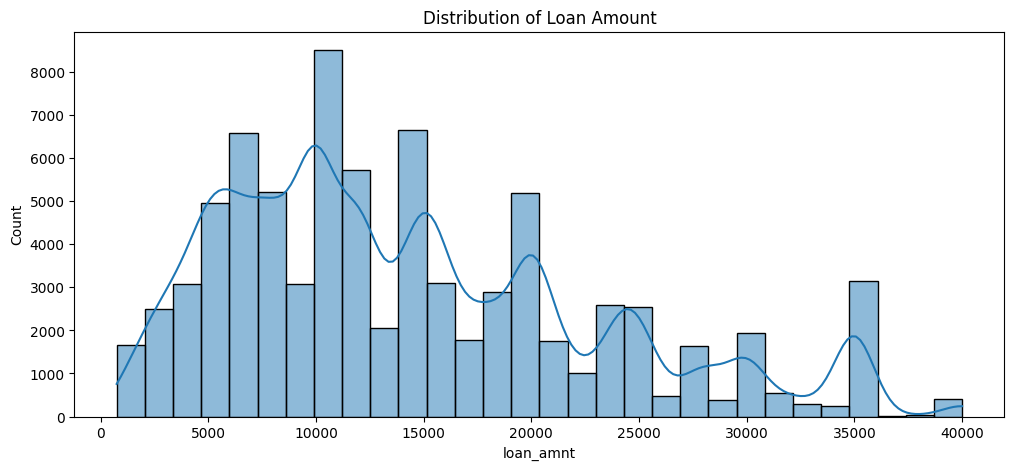

In [22]:
# distribution of loan_amnt
plt.figure(figsize=(12, 5))
sns.histplot(df_train['loan_amnt'], bins=30, kde=True)
plt.title('Distribution of Loan Amount')
plt.show()

Based on the histogram, the distribution of loan amount exhibits the following characteristics:

- The majority of loans fall within the range of \$5,000 to \$20,000.
- There is a gradual decrease in the frequency of loans as the loan amount increases.

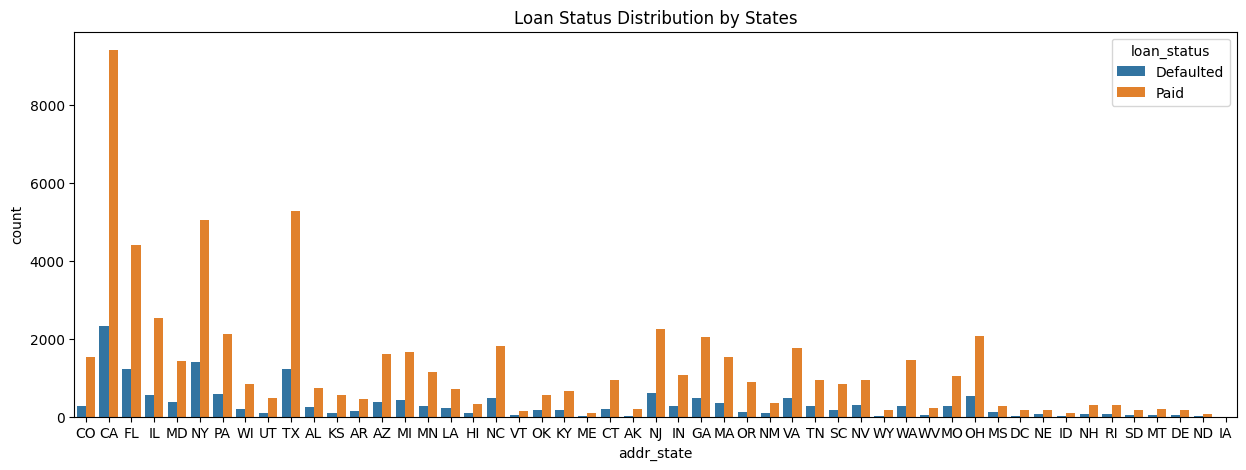

In [23]:
# loan status distribution by States
plt.figure(figsize=(15, 5))
sns.countplot(data=df_train, x='addr_state', hue='loan_status')
plt.title('Loan Status Distribution by States')
plt.show()

In [24]:
df_train['addr_state'].value_counts().head(10)

addr_state
CA    11744
TX     6493
NY     6461
FL     5618
IL     3098
NJ     2853
PA     2676
OH     2575
GA     2530
NC     2291
Name: count, dtype: int64

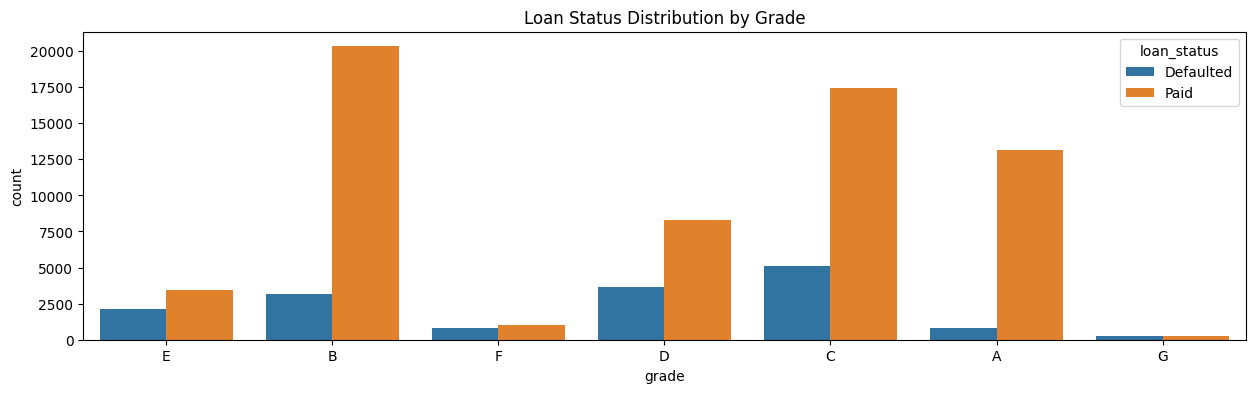

In [25]:
# loan status distribution by grade
plt.figure(figsize=(15, 4))
sns.countplot(data=df_train, x='grade', hue='loan_status')
plt.title('Loan Status Distribution by Grade')
plt.show()

- from the above plot we can say that highest loan cleared from B grade and highest Defulaters are from Grade C

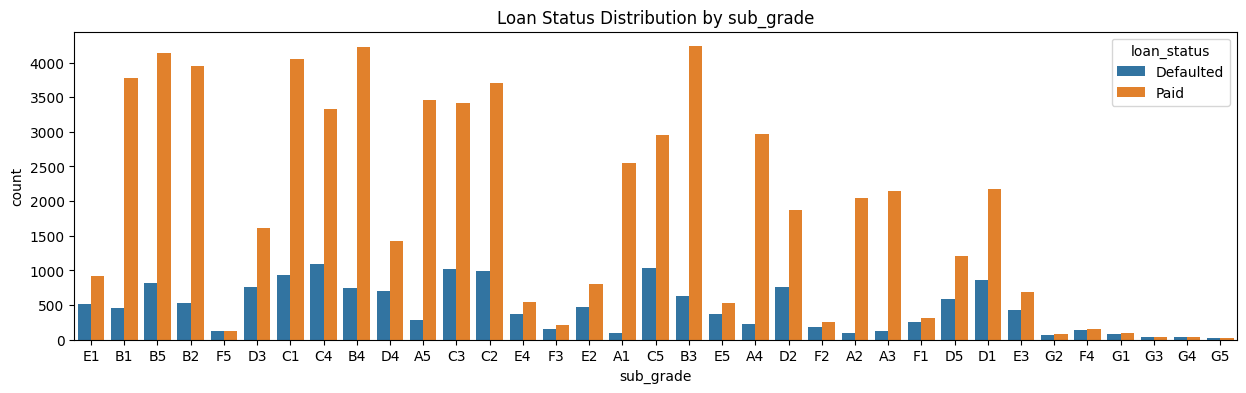

In [26]:
# loan status distribution by subgrade
plt.figure(figsize=(15, 4))
sns.countplot(data=df_train, x='sub_grade', hue='loan_status')
plt.title('Loan Status Distribution by sub_grade')
plt.show()

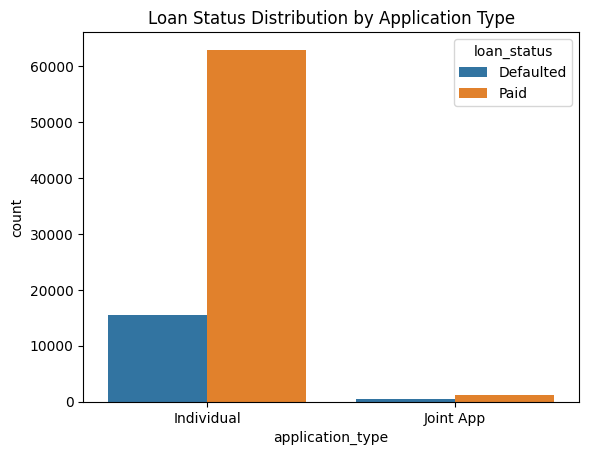

In [27]:
# loan status distribution by Application type
sns.countplot(data=df_train, x='application_type', hue='loan_status')
plt.title('Loan Status Distribution by Application Type')
plt.show()

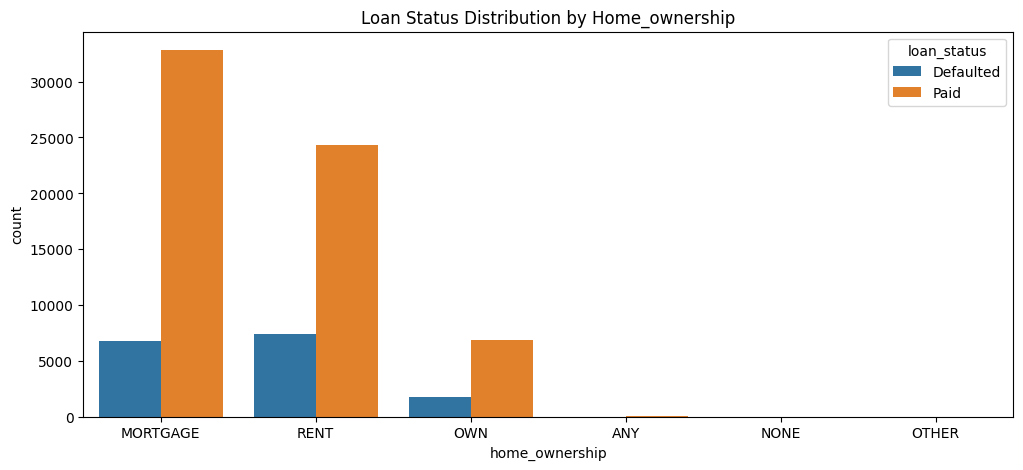

In [28]:
# loan status distribution by home ownership
plt.figure(figsize=(12, 5))
sns.countplot(data=df_train, x='home_ownership', hue='loan_status')
plt.title('Loan Status Distribution by Home_ownership')
plt.show()

- from the above chart we can say that, Mortagers has cleared the loan and highest defaulters are from Rent

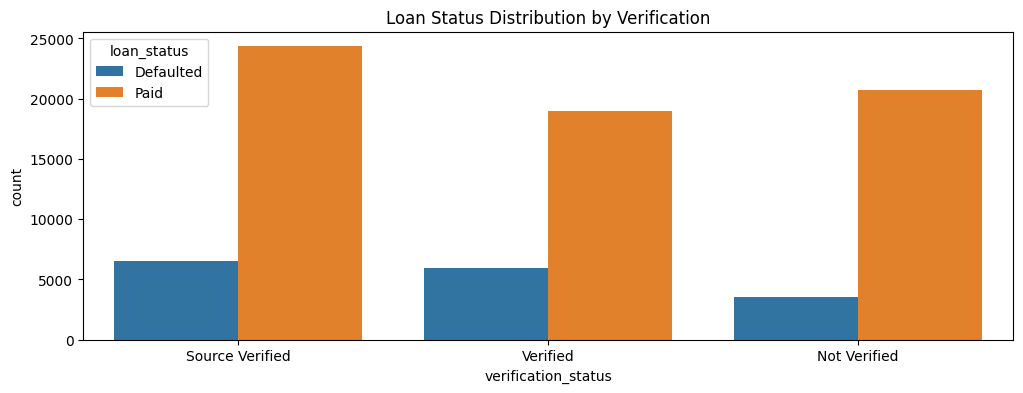

In [29]:
# loan status distribution by cerification
plt.figure(figsize=(12, 4))
sns.countplot(data=df_train, x='verification_status', hue='loan_status')
plt.title('Loan Status Distribution by Verification')
plt.show()

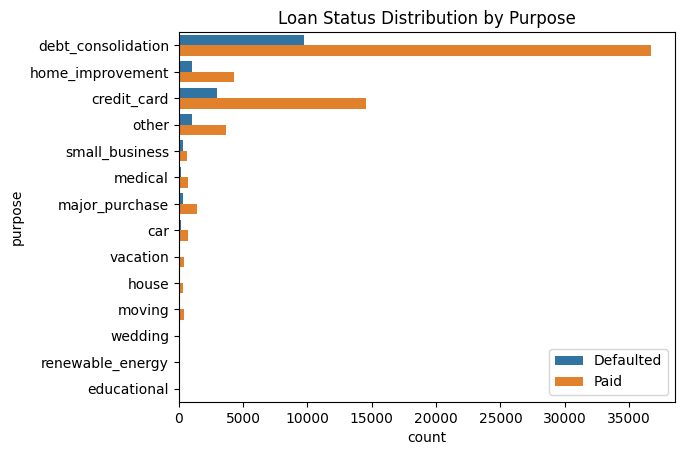

In [30]:
# loan status distribution by purpose
sns.countplot(data=df_train, y='purpose', hue='loan_status')
plt.title('Loan Status Distribution by Purpose')
plt.legend(loc='lower right')
plt.show()

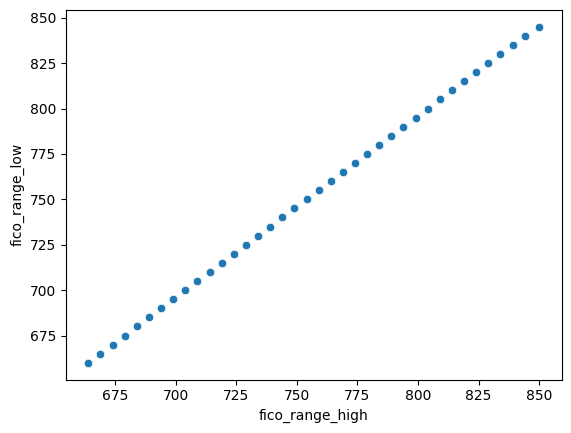

In [31]:
# distribution of FICO scores
sns.scatterplot(data=df_train, x='fico_range_high', y='fico_range_low')
plt.show()

- 'fico_range_low' and 'fico_range_high' have similar stats and are linearly related.

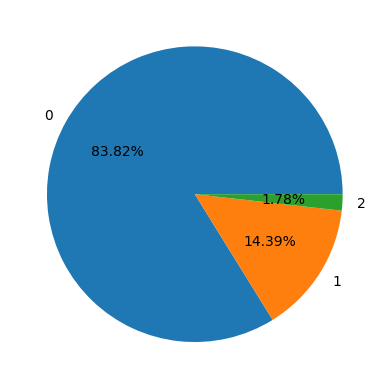

In [32]:
plt.pie(x=df_train['pub_rec'].value_counts().values[:3],
        labels=df_train['pub_rec'].value_counts().index[:3],
        autopct='%2.2f%%')
plt.show()

- Most people in this dataset don't have much derogatory public records.

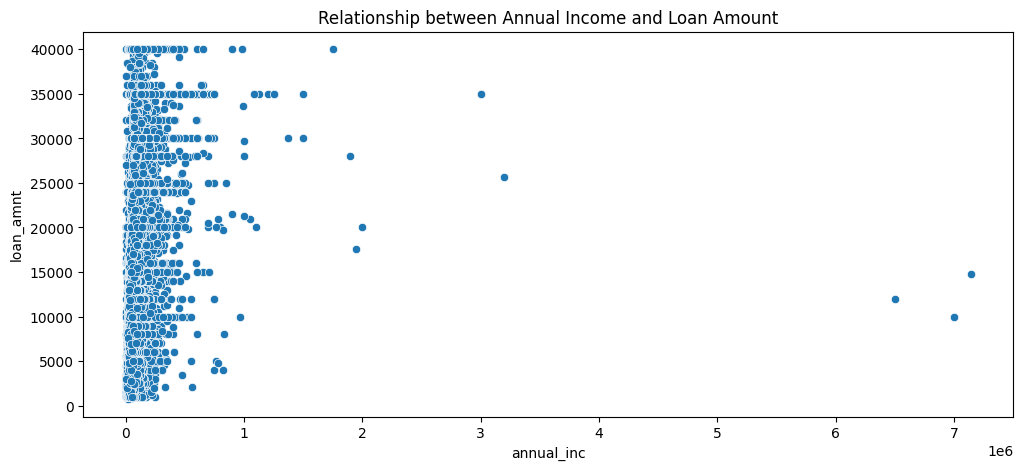

In [33]:
# relationship between annual_inc and loan_amnt
plt.figure(figsize=(12, 5))
sns.scatterplot(x='annual_inc', y='loan_amnt', data=df_train)
plt.title('Relationship between Annual Income and Loan Amount')
plt.show()

- As income increases, the density of data points decreases significantly. This suggests that individuals with higher incomes are less likely to take out loans or have smaller loan amounts.

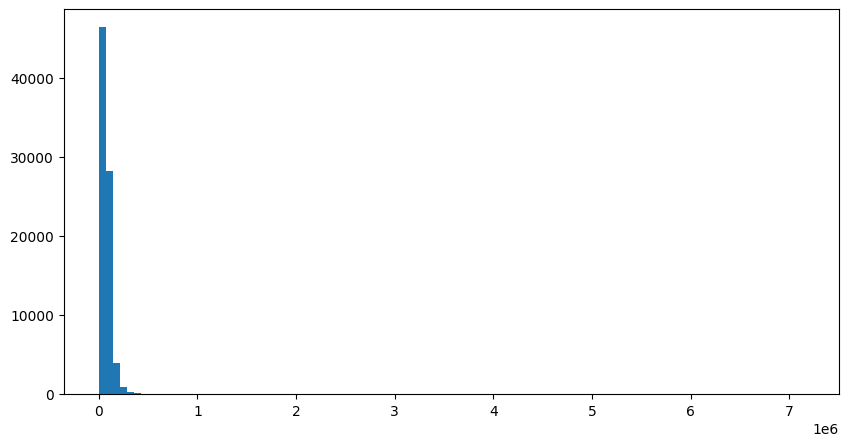

In [34]:
plt.figure(figsize=(10,5))
plt.hist(df_train['annual_inc'], bins=100)
plt.show()

- Most people's annual income is less than roughly $50,000.

### Encode Categorical Features

In [35]:
def data_type(dataset):
    num_train = []
    cat_train = []
    for col in dataset.columns:
        if dataset[col].dtype == 'int64' or dataset[col].dtype == 'float64':
            num_train.append(col)
        else:
            cat_train.append(col)
    return num_train, cat_train

num_train, cat_train = data_type(df_train)

def encoding(df, cat_train):
    for col in cat_train:
        df_train[col] = df_train[col].astype('category')
        df_train[col] = df_train[col].cat.codes
    return df_train

df_train = encoding(df_train, cat_train)

In [36]:
def data_type(dataset):
    num_test = []
    cat_test = []
    for col in dataset.columns:
        if dataset[col].dtype == 'int64' or dataset[col].dtype == 'float64':
            num_test.append(col)
        else:
            cat_test.append(col)
    return num_test, cat_test

num_test, cat_test = data_type(df_test)

def encoding(df, cat_test):
    for col in cat_test:
        df_test[col] = df_test[col].astype('category')
        df_test[col] = df_test[col].cat.codes
    return df_test

df_test = encoding(df_test, cat_test)

In [37]:
df_train.head()

,addr_state,annual_inc,earliest_cr_line,emp_length,emp_title,fico_range_high,fico_range_low,grade,home_ownership,application_type,initial_list_status,int_rate,loan_amnt,num_actv_bc_tl,mort_acc,tot_cur_bal,open_acc,pub_rec,pub_rec_bankruptcies,purpose,revol_bal,revol_util,sub_grade,term,title,total_acc,verification_status,loan_status
0,5,85000.0,341,10,7927,744,740,4,1,0,1,18.99,18075,1.0,1.0,319479.0,7,0,0.0,2,5338,93.6,20,60,1503,8,1,0
1,4,40000.0,218,10,7873,724,720,1,5,0,1,10.16,8800,4.0,0.0,19944.0,5,0,0.0,2,19944,60.3,5,36,1083,12,2,1
2,9,60000.0,462,10,17128,679,675,1,1,0,1,11.47,18000,4.0,2.0,23199.0,7,0,0.0,2,23199,88.5,9,36,1503,16,1,1
3,14,100742.0,139,10,35121,664,660,1,1,0,1,9.16,20000,4.0,1.0,72651.0,12,0,0.0,2,18425,69.0,6,36,1503,19,1,1
4,20,80000.0,365,10,26488,669,665,5,5,0,0,23.83,35000,14.0,7.0,64631.0,23,0,0.0,2,34370,90.0,29,60,1290,59,2,1


### Feature Selection

Let's remove the irrelevant features for the analytical tasks.

In [38]:
df_train.drop(columns=['earliest_cr_line', 'addr_state', 'emp_title','initial_list_status','purpose','title'], inplace=True)
df_test.drop(columns=['earliest_cr_line', 'addr_state', 'emp_title','initial_list_status','purpose','title'], inplace=True)

In [39]:
df_train.drop_duplicates(inplace=True)
df_test.drop_duplicates(inplace=True)

In [40]:
x=df_train.drop(columns='loan_status')
y=df_train['loan_status']

### Handling imbalanced data

In [41]:
df_train['loan_status'].value_counts(normalize=True)*100

loan_status
1    80.0375
0    19.9625
Name: proportion, dtype: float64

- we can see that the given dataset is highly imbalanced. To address this, we will use SMOTE.

In [42]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(sampling_strategy='auto', random_state=42)
x_train_sm, y_train_sm = sm.fit_resample(x, y)

In [43]:
df_train_sm = pd.concat([x_train_sm, y_train_sm], axis=1)

In [44]:
df_train_sm['loan_status'].value_counts(normalize=True)*100

loan_status
0    50.0
1    50.0
Name: proportion, dtype: float64

### Split Data

In [45]:
x_train,x_test,y_train,y_test = train_test_split(x_train_sm, y_train_sm, test_size=0.3, random_state=42)

In [46]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(89642, 21)
(38418, 21)
(89642,)
(38418,)


### Train Model

> **Logistic Regression**

In [47]:
from sklearn.linear_model import LogisticRegression
lr_model = LogisticRegression(random_state=42)
lr_model.fit(x_train, y_train)
y_pred_lr = lr_model.predict(x_test)

In [48]:
accuracy_lr = round(accuracy_score(y_pred_lr, y_test) * 100, 2)
print(f'Logistic Regression Accuracy: {accuracy_lr}%')

Logistic Regression Accuracy: 64.43%


In [49]:
f1_lr = round(f1_score(y_test, y_pred_lr)*100,2)
print(f'Logistic Regression F1 Score: {f1_lr}%')

Logistic Regression F1 Score: 66.43%


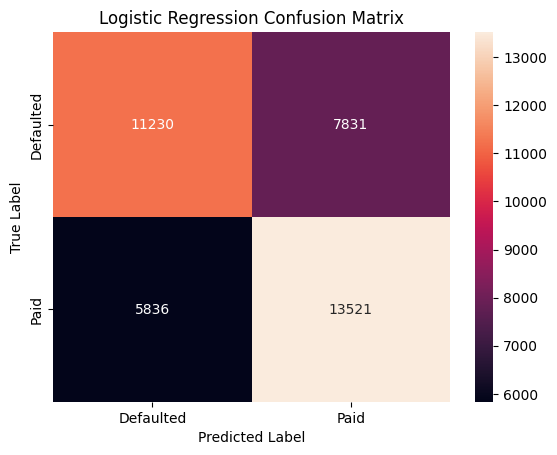

In [50]:
cm = confusion_matrix(y_test, y_pred_lr)

labels = ['Defaulted', 'Paid']
sns.heatmap(cm, annot=True, fmt="d", xticklabels=labels, yticklabels=labels)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Logistic Regression Confusion Matrix")
plt.show()

> **Decision Tree**

In [51]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(criterion='entropy', random_state=42)
dt.fit(x_train, y_train)
y_pred_dt = dt.predict(x_test)

In [52]:
accuracy_dt = round(accuracy_score(y_pred_dt, y_test) * 100, 2)
print(f'Decision Tree Accuracy: {accuracy_dt}%')

Decision Tree Accuracy: 77.83%


In [53]:
f1_dt = round(f1_score(y_test, y_pred_dt)*100,2)
print(f'Decision Tree F1 Score: {f1_dt}%')

Decision Tree F1 Score: 77.63%


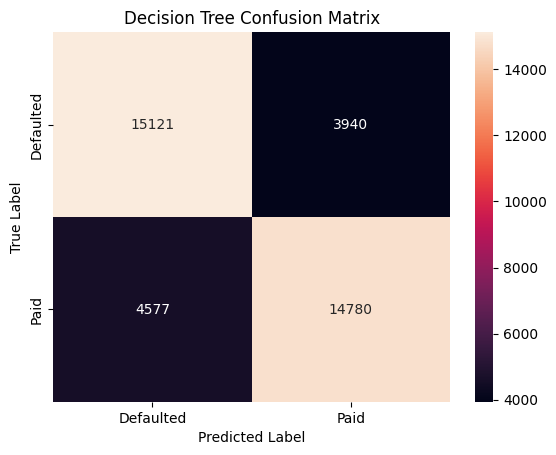

In [54]:
cm = confusion_matrix(y_test, y_pred_dt)

labels = ['Defaulted', 'Paid']
sns.heatmap(cm, annot=True, fmt='d', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Decision Tree Confusion Matrix')
plt.show()

> **XGBoost**

In [55]:
from xgboost import XGBClassifier
xgb_model = XGBClassifier(n_estimators=100, random_state=42)
xgb_model.fit(x_train, y_train)
y_pred_xgb = xgb_model.predict(x_test)

In [56]:
accuracy_xgb = round(accuracy_score(y_pred_xgb, y_test) * 100, 2)
print(f'XGBoost Accuracy: {accuracy_xgb}%')

XGBoost Accuracy: 86.59%


In [57]:
f1_xgb = round(f1_score(y_test, y_pred_xgb)*100,2)
print(f'XGBoost F1 Score: {f1_xgb}%')

XGBoost F1 Score: 87.84%


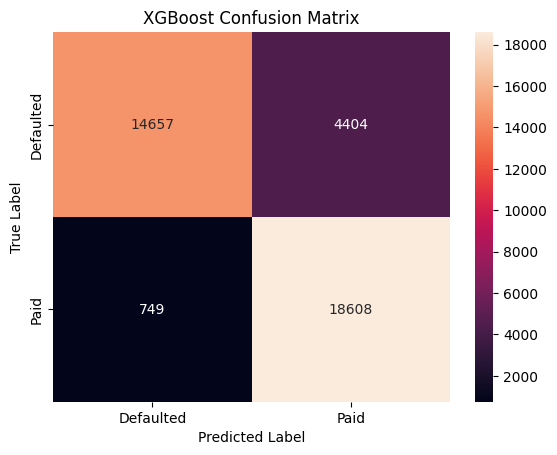

In [58]:
cm = confusion_matrix(y_test, y_pred_xgb)
labels = ['Defaulted', 'Paid']
sns.heatmap(cm, annot=True, fmt='d', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('XGBoost Confusion Matrix')
plt.show()

> **AdaBoost**

In [59]:
from sklearn.ensemble import AdaBoostClassifier
ada_model = AdaBoostClassifier(n_estimators=100, random_state=42)
ada_model.fit(x_train, y_train)
y_pred_ada = ada_model.predict(x_test)

In [60]:
accuracy_ada = round(accuracy_score(y_pred_ada, y_test) * 100, 2)
print(f'AdaBoost Accuracy: {accuracy_ada}%')

AdaBoost Accuracy: 82.21%


In [61]:
f1_ada = round(f1_score(y_test, y_pred_ada)*100,2)
print(f'AdaBoost F1 Score: {f1_ada}%')

AdaBoost F1 Score: 83.22%


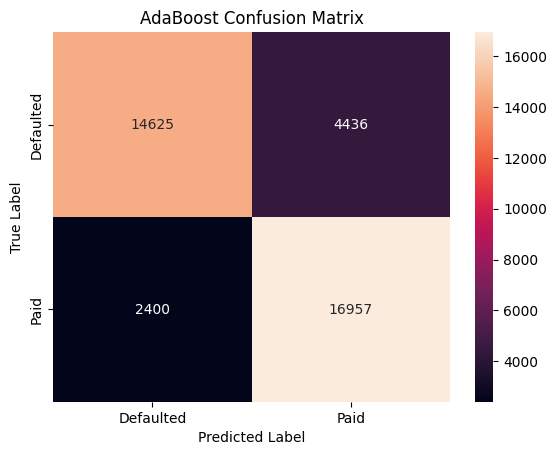

In [62]:
cm = confusion_matrix(y_test, y_pred_ada)
labels = ['Defaulted', 'Paid']
sns.heatmap(cm, annot=True, fmt='d', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('AdaBoost Confusion Matrix')
plt.show()

-  Overall, `XGBoost` and `AdaBoost` has emerged as the most suitable models for predicting loan repayment behavior based on the given dataset. Additional techniques like hyperparameter tuning could be explored to further enhance the performance of the models.

### Hyperparameter Tuning

In [63]:
from sklearn.model_selection import StratifiedKFold
skf = StratifiedKFold(n_splits=5, random_state=42, shuffle=True)

# XGBoost with StratifiedKFold
accuracy_xgb_folds = []
f1_xgb_folds = []
for train_index, test_index in skf.split(x_train_sm, y_train_sm):
    x_train_fold, x_test_fold = x_train_sm.iloc[train_index], x_train_sm.iloc[test_index]
    y_train_fold, y_test_fold = y_train_sm.iloc[train_index], y_train_sm.iloc[test_index]
    xgb_model.fit(x_train_fold, y_train_fold)
    y_pred_xgb_fold = xgb_model.predict(x_test_fold)
    accuracy_xgb_folds.append(accuracy_score(y_test_fold, y_pred_xgb_fold))
    f1_xgb_folds.append(f1_score(y_test_fold, y_pred_xgb_fold))
avg_accuracy_xgb = round(np.mean(accuracy_xgb_folds) * 100, 2)
avg_f1_xgb = round(np.mean(f1_xgb_folds) * 100, 2)
print(f'Average XGBoost Accuracy with StratifiedKFold: {avg_accuracy_xgb}%')
print(f'Average XGBoost F1 Score with StratifiedKFold: {avg_f1_xgb}%')

# AdaBoost with StratifiedKFold
accuracy_ada_folds = []
f1_ada_folds = []
for train_index, test_index in skf.split(x_train_sm, y_train_sm):
    x_train_fold, x_test_fold = x_train_sm.iloc[train_index], x_train_sm.iloc[test_index]
    y_train_fold, y_test_fold = y_train_sm.iloc[train_index], y_train_sm.iloc[test_index]
    ada_model.fit(x_train_fold, y_train_fold)
    y_pred_ada_fold = ada_model.predict(x_test_fold)
    accuracy_ada_folds.append(accuracy_score(y_test_fold, y_pred_ada_fold))
    f1_ada_folds.append(f1_score(y_test_fold, y_pred_ada_fold))
avg_accuracy_ada = round(np.mean(accuracy_ada_folds) * 100, 2)
avg_f1_ada = round(np.mean(f1_ada_folds) * 100, 2)
print(f'Average AdaBoost Accuracy with StratifiedKFold: {avg_accuracy_ada}%')
print(f'Average AdaBoost F1 Score with StratifiedKFold: {avg_f1_ada}%')

Average XGBoost Accuracy with StratifiedKFold: 86.64%
Average XGBoost F1 Score with StratifiedKFold: 87.84%
Average AdaBoost Accuracy with StratifiedKFold: 81.75%
Average AdaBoost F1 Score with StratifiedKFold: 82.7%


- Therefore, the `XGBoost` model with *StratifiedKFold cross-validation* is the preferred choice for predicting loan repayment behavior based on the given dataset. Its superior accuracy and F1 score indicate its effectiveness in capturing the underlying patterns and making reliable predictions.

### Target prediction for test data

In [64]:
y_pred_xgb_test = xgb_model.predict(df_test)

label_mapping = {0: 'Defaulted', 1: 'Paid'} # Mapping dictionary
predicted_results = [label_mapping[label] for label in y_pred_xgb_test] # Mapping predicted labels to categories

df_test['loan_status'] = predicted_results
df_test[['loan_status']].to_csv('test_loan_results.csv', index=False)

In [65]:
df_results = pd.read_csv('test_loan_results.csv')
df_results.head()

,loan_status
0,Defaulted
1,Paid
2,Paid
3,Defaulted
4,Paid


## Conclusion

- In conclusion, the analysis and modeling efforts carried out on the loan repayment dataset have yielded valuable insights and enabled the prediction of loan status for the test data. XGBoost emerged as the most suitable model for this task, with an average accuracy of 86.64% and an average F1 score of 87.84% when evaluated using StratifiedKFold cross-validation. By leveraging this model, we successfully predicted the loan repayment behavior for the test dataset and exported the results to a CSV file.

- These findings hold practical significance for financial institutions and lending organizations, as they can utilize the developed model to assess the creditworthiness of potential borrowers more accurately. This can lead to improved risk management, reduced loan defaults, and ultimately, enhanced financial stability.

- Further enhancements to the model could involve exploring additional data sources, incorporating domain knowledge, and experimenting with different hyperparameter tuning strategies. Additionally, investigating other machine learning algorithms or ensemble methods could potentially yield even better results.

- Overall, the project successfully addressed the challenge of predicting loan repayment behavior based on the provided dataset, offering valuable insights and a robust model for future use.